In [43]:
import pandas as pd


In [44]:
data = pd.read_csv('Salary_Data.csv')

In [45]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [46]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [47]:
data.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [48]:
import numpy as np

In [49]:
X = data["YearsExperience"]
Y = data["Salary"]

In [50]:
X = np.array(X)

In [51]:
print(X)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5]


In [52]:
X = X.reshape(-1,1)

In [53]:
print(X)


[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [54]:
from sklearn.svm import SVR 

In [55]:
model = SVR(C= 1000, gamma = 0.05, kernel='rbf')
model.fit(X, Y)

SVR(C=1000, gamma=0.05)

In [56]:
import matplotlib.pyplot as plt


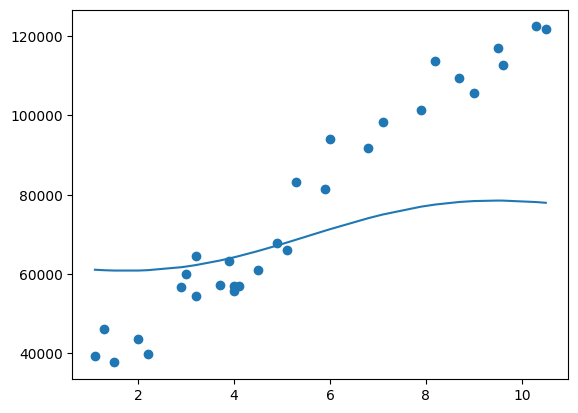

In [57]:
plt.scatter(X, Y)
plt.plot(X, model.predict(X))


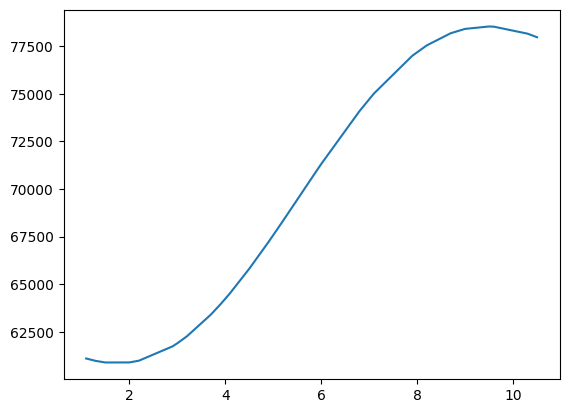

In [58]:
plt.plot(X, model.predict(X))

As you can see that the model is not really fit to the data set, so we need to evaluate the model

In [59]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'kernel': ['rbf'],
    'C' : [1000,10000, 1000000],
    'gamma': [0.5, 0.05, 0.005]
}
grid_search = GridSearchCV(model, parameters)

In [60]:
grid_search.fit(X,Y)

GridSearchCV(estimator=SVR(C=1000, gamma=0.05),
             param_grid={'C': [1000, 10000, 1000000],
                         'gamma': [0.5, 0.05, 0.005], 'kernel': ['rbf']})

In [61]:
print(grid_search.best_params_)

{'C': 1000000, 'gamma': 0.005, 'kernel': 'rbf'}


In [62]:
new_model = SVR(C=1000000, gamma = 0.05, kernel = 'rbf')
new_model.fit(X, Y)

SVR(C=1000000, gamma=0.05)

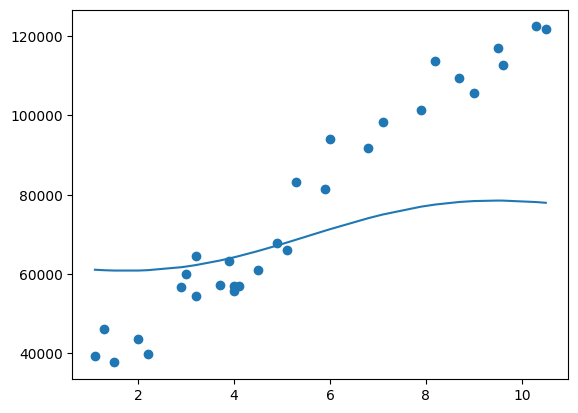

In [63]:
plt.scatter(X, Y)
plt.plot(X, model.predict(X))
